In [2]:
# climate_change_analysis.py
import pandas as pd
import numpy as np
import plotly.express as px
from textblob import TextBlob # For sentiment analysis
import re # Regular expressions for text cleaning
from collections import Counter # For word frequency
import matplotlib.pyplot as plt # For non-interactive plots if preferred
import seaborn as sns # For enhanced statistical plots


In [3]:
# --- 1. Data Loading and Initial Exploration ---
print("--- 1. Data Loading and Initial Exploration ---")

# Load the dataset
try:
    df = pd.read_csv('climate_nasa.csv')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: 'climate_nasa.csv' not found. Please ensure the file is in the correct directory.")
    exit() # Exit if the file isn't found

# Display the first few rows
print("\n--- Head of the Dataset ---")
print(df.head())

# Get information about the dataset (data types, non-null values)
print("\n--- Dataset Info ---")
df.info()

# Get descriptive statistics for numerical columns
print("\n--- Descriptive Statistics ---")
print(df.describe())

# Check for missing values
print("\n--- Missing Values Check ---")
print(df.isnull().sum())


--- 1. Data Loading and Initial Exploration ---
Dataset loaded successfully.

--- Head of the Dataset ---
                       date  likesCount  \
0  2022-09-07T17:12:32.000Z           2   
1  2022-09-08T14:51:13.000Z           0   
2  2022-09-07T17:19:41.000Z           1   
3  2022-09-08T00:51:30.000Z           4   
4  2022-09-07T19:06:20.000Z          16   

                                         profileName  commentsCount  \
0  4dca617d86b3fdce80ba7e81fb16e048c9cd9798cdfd6d...            NaN   
1  518ab97f2d115ba5b6f03b2fba2ef2b120540c9681288b...            NaN   
2  d82e8e24eb633fd625b0aef9b3cb625cfb044ceb8483e1...            3.0   
3  37a509fa0b5177a2233c7e2d0e2b2d6916695fa9fba3f2...            NaN   
4  e54fbbd42a729af9d04d9a5cc1f9bbfe8081a31c219ecb...           26.0   

                                                text  
0  Neat comparison I have not heard it before.\n ...  
1  An excellent way to visualise the invisible! T...  
2  Does the CO2/ghg in the troposphere affe

In [4]:

# --- 2. Data Preprocessing & Feature Engineering ---
print("\n--- 2. Data Preprocessing & Feature Engineering ---")

# Convert 'date' column to datetime objects
df['date'] = pd.to_datetime(df['date'])

# Extract 'Year' and 'Month' for temporal analysis
df['year'] = df['date'].dt.year
df['month_year'] = df['date'].dt.to_period('M').astype(str)

# Handle missing 'text' values by filling with empty string
df['text'] = df['text'].fillna('')

# Function for basic text cleaning
def clean_text(text):
    text = text.lower() # Convert to lowercase
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE) # Remove URLs
    text = re.sub(r'\@\w+|\#', '', text) # Remove mentions and hashtags symbols
    text = re.sub(r'[^\w\s]', '', text) # Remove punctuation
    text = re.sub(r'\d+', '', text) # Remove numbers
    text = text.strip() # Remove leading/trailing whitespace
    return text

# Apply text cleaning
df['cleaned_text'] = df['text'].apply(clean_text)

print("\n--- Cleaned Text Example (First 5) ---")
for i, row in df.head(5).iterrows():
    print(f"Original: {row['text'][:50]}...")
    print(f"Cleaned: {row['cleaned_text'][:50]}...\n")



--- 2. Data Preprocessing & Feature Engineering ---

--- Cleaned Text Example (First 5) ---
Original: Neat comparison I have not heard it before.
 I wou...
Cleaned: neat comparison i have not heard it before
 i woul...

Original: An excellent way to visualise the invisible! Thank...
Cleaned: an excellent way to visualise the invisible thanks...

Original: Does the CO2/ghg in the troposphere affect the str...
Cleaned: does the coghg in the troposphere affect the strat...

Original: excellent post! I defo feel the difference - one i...
Cleaned: excellent post i defo feel the difference  one i c...

Original: Yes, and carbon dioxide does not harm the Earth li...
Cleaned: yes and carbon dioxide does not harm the earth lik...



C:\Users\Hi\AppData\Local\Temp\ipykernel_8720\3553649666.py:9: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['month_year'] = df['date'].dt.to_period('M').astype(str)


In [5]:
# --- 3. Sentiment Analysis ---
print("\n--- 3. Sentiment Analysis ---")

# Function to get sentiment polarity using TextBlob
def get_sentiment(text):
    analysis = TextBlob(text)
    # Return polarity: -1 for negative, 0 for neutral, 1 for positive
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis
df['sentiment'] = df['cleaned_text'].apply(get_sentiment)
df['polarity'] = df['cleaned_text'].apply(lambda text: TextBlob(text).sentiment.polarity)

print("\n--- Sentiment Distribution ---")
print(df['sentiment'].value_counts(normalize=True))



--- 3. Sentiment Analysis ---

--- Sentiment Distribution ---
sentiment
Neutral     0.427203
Positive    0.394636
Negative    0.178161
Name: proportion, dtype: float64


In [6]:
# Visualize sentiment distribution
sentiment_counts = df['sentiment'].value_counts(normalize=True).reset_index()
sentiment_counts.columns = ['sentiment', 'proportion']

fig_sentiment_dist = px.bar(
    sentiment_counts,
    x='sentiment',
    y='proportion',
    title='Distribution of Sentiment in Climate Change Discussions',
    labels={'sentiment': 'Sentiment', 'proportion': 'Proportion'},
    color='sentiment',
    color_discrete_map={'Positive': 'green', 'Negative': 'red', 'Neutral': 'blue'}
)
fig_sentiment_dist.show()


In [7]:
# --- 4. Engagement Analysis ---
print("\n--- 4. Engagement Analysis ---")

# Average likes and comments by sentiment
engagement_by_sentiment = df.groupby('sentiment')[['likesCount', 'commentsCount']].mean().reset_index()
print("\n--- Average Likes and Comments by Sentiment ---")
print(engagement_by_sentiment)
# Visualize average likes by sentiment
fig_likes_sentiment = px.bar(engagement_by_sentiment, x='sentiment', y='likesCount',
                             title='Average Likes by Sentiment',
                             labels={'likesCount': 'Average Likes'},
                             color='sentiment',
                             color_discrete_map={'Positive': 'green', 'Negative': 'red', 'Neutral': 'blue'})
fig_likes_sentiment.show()



--- 4. Engagement Analysis ---

--- Average Likes and Comments by Sentiment ---
  sentiment  likesCount  commentsCount
0  Negative    5.494624      11.416667
1   Neutral    2.309417       6.882353
2  Positive    6.980583       8.909910


In [8]:

# Visualize average comments by sentiment
fig_comments_sentiment = px.bar(engagement_by_sentiment, x='sentiment', y='commentsCount',
                                title='Average Comments by Sentiment',
                                labels={'commentsCount': 'Average Comments'},
                                color='sentiment',
                                color_discrete_map={'Positive': 'green', 'Negative': 'red', 'Neutral': 'blue'})
fig_comments_sentiment.show()

# Correlation between likes, comments, and polarity
correlation_matrix = df[['likesCount', 'commentsCount', 'polarity']].corr()
print("\n--- Correlation Matrix (Likes, Comments, Polarity) ---")
print(correlation_matrix)



--- Correlation Matrix (Likes, Comments, Polarity) ---
               likesCount  commentsCount  polarity
likesCount       1.000000       0.370355  0.045284
commentsCount    0.370355       1.000000 -0.063446
polarity         0.045284      -0.063446  1.000000


In [9]:
# --- 5. Basic Text Analysis (Most Common Words) ---
print("\n--- 5. Basic Text Analysis (Most Common Words) ---")

# Combine all cleaned text into a single string
all_words = ' '.join(df['cleaned_text']).split()

# Remove common English stop words and specific climate-related words that might dominate
# without providing much insight into specific topics.
stop_words = set([
    'the', 'a', 'an', 'is', 'it', 'and', 'to', 'of', 'for', 'with', 'in', 'on', 'that', 'this',
    'be', 'not', 'as', 'by', 'from', 'at', 'have', 'do', 'we', 'you', 'can', 'will', 'are',
    'has', 'its', 'about', 'just', 'so', 'was', 'like', 'how', 'what', 'or', 'if', 'but',
    'my', 'our', 'your', 'all', 'more', 'they', 'their', 'there', 'what', 'when', 'why',
    'which', 'who', 'where', 'get', 'dont', 'thats', 'much', 'see', 'think', 'nasa', 'climate',
    'change', 'earth', 'global', 'warming', 'temperatures', 'years', 'said', 'people', 'us'
])

# Count word frequency, excluding stop words
filtered_words = [word for word in all_words if word not in stop_words and len(word) > 2] # Exclude very short words
word_counts = Counter(filtered_words)

# Get the 20 most common words
most_common_words = word_counts.most_common(20)
print("\n--- 20 Most Common Words (excluding stop words) ---")
for word, count in most_common_words:
    print(f"{word}: {count}")

# Visualize most common words
fig_common_words = px.bar(x=[word for word, count in most_common_words],
                          y=[count for word, count in most_common_words],
                          title='Top 20 Most Common Words in Comments',
                          labels={'x': 'Word', 'y': 'Frequency'})
fig_common_words.show()


--- 5. Basic Text Analysis (Most Common Words) ---

--- 20 Most Common Words (excluding stop words) ---
carbon: 57
atmosphere: 55
would: 47
planet: 44
ice: 41
been: 41
water: 40
temperature: 40
year: 40
now: 39
one: 38
dioxide: 38
into: 35
level: 35
sea: 35
only: 34
world: 32
than: 31
because: 31
know: 30


In [10]:

# --- 6. Temporal Analysis of Sentiment ---
print("\n--- 6. Temporal Analysis of Sentiment ---")

# Group by month and year to see sentiment trends over time
sentiment_over_time = df.groupby('month_year')['polarity'].mean().reset_index()
sentiment_over_time['date_period'] = pd.to_datetime(sentiment_over_time['month_year']) # Convert back for proper sorting

# Sort by date
sentiment_over_time = sentiment_over_time.sort_values('date_period')

fig_sentiment_trend = px.line(sentiment_over_time, x='date_period', y='polarity',
                              title='Average Sentiment Polarity Over Time',
                              labels={'date_period': 'Date', 'polarity': 'Average Sentiment Polarity'},
                              markers=True) # Add markers to show individual data points
fig_sentiment_trend.show()

# Count of comments over time
comments_over_time = df.groupby('month_year').size().reset_index(name='comment_count')
comments_over_time['date_period'] = pd.to_datetime(comments_over_time['month_year'])
comments_over_time = comments_over_time.sort_values('date_period')

fig_comment_count = px.line(comments_over_time, x='date_period', y='comment_count',
                            title='Number of Comments Over Time',
                            labels={'date_period': 'Date', 'comment_count': 'Number of Comments'},
                            markers=True)
fig_comment_count.show()



--- 6. Temporal Analysis of Sentiment ---


In [11]:
# --- 7. Predictive Modeling for Engagement ---
print("\n--- 7.Predictive Modeling for Engagement ---")

# Objective: Predict 'likesCount' based on comment features.
# Features chosen: 'polarity' (sentiment) and 'text_length'
# We will also use 'commentsCount' as a feature, as it often correlates with likes.

# importing necessary libraries for modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Add text_length feature if not already present
if 'text_length' not in df.columns:
    df['text_length'] = df['cleaned_text'].apply(len)

# Define features (X) and target (y)
features = ['polarity', 'text_length', 'commentsCount']
target = 'likesCount'

# Filter out rows with NaN in selected features or target if any, though handled for 'text'
model_df = df.dropna(subset=features + [target])

X = model_df[features]
y = model_df[target]

print(f"\nFeatures used for prediction: {features}")
print(f"Target variable: {target}")
print(f"Shape of X: {X.shape}, Shape of y: {y.shape}")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining data shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Testing data shape: X_test={X_test.shape}, y_test={y_test.shape}")

# --- Model 1: Linear Regression ---
print("\n--- Model 1: Linear Regression ---")
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, y_train)

# Make predictions
y_pred_lr = lin_reg_model.predict(X_test)

# Evaluate Linear Regression model
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression - Mean Squared Error (MSE): {mse_lr:.4f}")
print(f"Linear Regression - R-squared (R2): {r2_lr:.4f}")
print(f"Linear Regression - Coefficients: {lin_reg_model.coef_}")
print(f"Linear Regression - Intercept: {lin_reg_model.intercept_:.4f}")


--- 7.Predictive Modeling for Engagement ---

Features used for prediction: ['polarity', 'text_length', 'commentsCount']
Target variable: likesCount
Shape of X: (244, 3), Shape of y: (244,)

Training data shape: X_train=(195, 3), y_train=(195,)
Testing data shape: X_test=(49, 3), y_test=(49,)

--- Model 1: Linear Regression ---
Linear Regression - Mean Squared Error (MSE): 255.3614
Linear Regression - R-squared (R2): 0.2755
Linear Regression - Coefficients: [ 4.06390091e+00 -8.79962728e-04  3.16448367e-01]
Linear Regression - Intercept: 4.9601



--- Model 2: Random Forest Regressor ---
Random Forest Regressor - Mean Squared Error (MSE): 286.6715
Random Forest Regressor - R-squared (R2): 0.1867

Random Forest - Feature Importances:
text_length      0.369391
commentsCount    0.347769
polarity         0.282839
dtype: float64


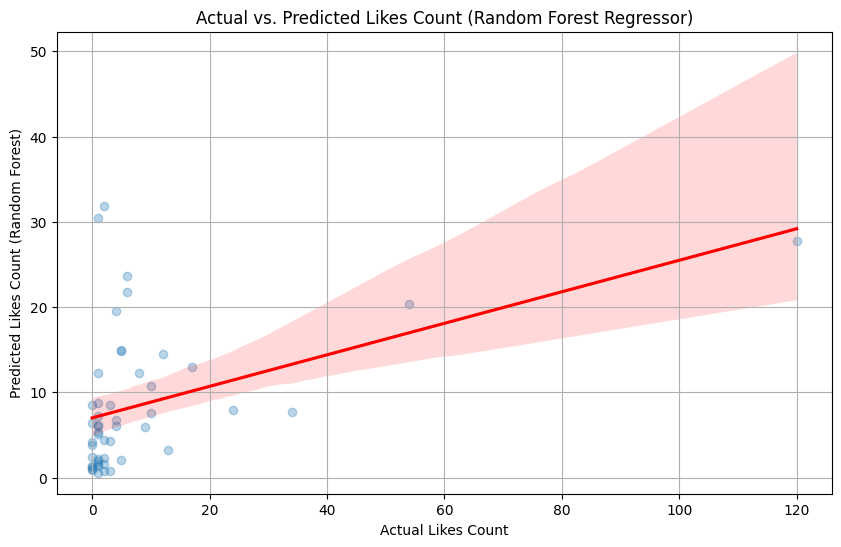

In [12]:
# --- Model 2: Random Forest Regressor ---
print("\n--- Model 2: Random Forest Regressor ---")
# Random Forest is generally more robust for complex, non-linear relationships
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1) # n_jobs=-1 uses all available cores
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate Random Forest Regressor model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Regressor - Mean Squared Error (MSE): {mse_rf:.4f}")
print(f"Random Forest Regressor - R-squared (R2): {r2_rf:.4f}")

# Feature importance from Random Forest
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nRandom Forest - Feature Importances:")
print(feature_importances)

# Visualize predictions vs actual (for Random Forest)
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=y_pred_rf, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.xlabel("Actual Likes Count")
plt.ylabel("Predicted Likes Count (Random Forest)")
plt.title("Actual vs. Predicted Likes Count (Random Forest Regressor)")
plt.grid(True)
plt.show()